Load two surfaces of size $3*N_{\phi}*N_{\theta}$, where $\phi$ denotes the polar angle and $\theta$ denotes the azimuthal angle.

To use the code, $N_{\theta}$ must be odd.

In [1]:
import scipy.io as sio
from ShapePackages.ComputeGeoPara import *

# Example 

mat_f= sio.loadmat('ShapeData/example_50_99.mat')  
f1 = torch.from_numpy(mat_f['f1']).float() # 3*50*99
f2 = torch.from_numpy(mat_f['f2']).float()

Calculate a geodesic in the space of parametrized surfaces

In [2]:
%%time

T = 7
a, b, c, d = 0, 1/2, 1, 0

opts = {'Cmetric': (a, b, c, d),  # choices of the split metric
        'Tpts': T,  # the number of the time points
        'MaxDegHarmSurf': 5,  # the maximal degree of spherical harmonics for the space of parametrized surfaces
        'Max_ite': 200,  # the maximal number of iteration for the whole optimization 
        }
geo_f, EnergyAll0 = compute_geodesic_main(f1, f2, **opts)

Wall time: 40.6 s


In [3]:
print('The number of iterations in the optimization process is', len(EnergyAll0),'and the final energy is', EnergyAll0[-1])

The number of iterations in the optimization process is 66 and the final energy is 6.4391021728515625


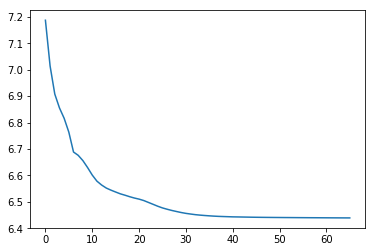

In [8]:
# plot the energy 
import matplotlib.pyplot as plt
plt.plot(EnergyAll0)
plt.show()

In [7]:
# plot the geodesic

from mayavi import mlab
from ShapePackages.RegistrationFunc import get_idty_S2

idty = get_idty_S2(*f1.shape[-2:])
Gx, Gy = np.gradient(idty[2]) # gradients with respect to x and y
Grad = (Gx**2+Gy**2)**.5  # gradient magnitude  PHI, THETA
w = Grad/Grad.max()  

%gui qt

mlab.init_notebook('x3d',1000,500) # png & x3d
mlab.figure(1, size=(100,70), fgcolor=(1, 1, 1), bgcolor=(0.5, 0.5, 0.5))
mlab.clf()

# plot the geodesic
for i in range(T):
    s0 = mlab.mesh(geo_f[i, 0].numpy()+2*i, geo_f[i, 1].numpy(), geo_f[i, 2].numpy(),representation='wireframe',scalars=w)

mlab.view(azimuth=270, elevation=90)
mlab.show()
s0

Notebook initialized with x3d backend.
